<a href="https://colab.research.google.com/github/Gayathri-Patibandla/FML/blob/main/Univariate_on_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

Reading dataset


In [4]:
Company=pd.read_csv("/content/Company_data.csv")

In [5]:
Company.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
Company.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Checking Null values

In [8]:
Company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
Company.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
Company.shape

(200, 4)

Checking correlation between input features and target output

In [13]:
Company.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Here, Sales is dependent on TV feature(more)

In [14]:
X = Company.drop('Sales', axis=1).values
y = Company['Sales'].values

In [21]:
X_TV=X[:,0]

In [22]:
type(X_TV),type(y)

(numpy.ndarray, numpy.ndarray)

In [23]:
X_TV.shape,y.shape

((200,), (200,))

In [24]:
X_TV=X_TV.reshape(-1,1)
y=y.reshape(-1,1)

In [25]:
X_TV.shape,y.shape

((200, 1), (200, 1))

plotting a Scatterplot for TV feature and y target

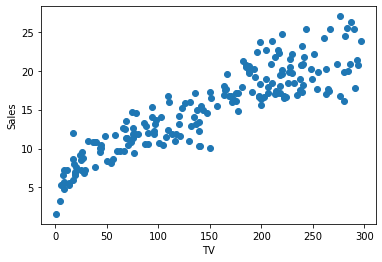

In [26]:
plt.scatter(X_TV,y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Training the Model

In [29]:
reg=linear_model.LinearRegression()
reg.fit(X_TV,y)

LinearRegression()

Evaluating the model

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=reg.predict(X_TV)
print(f'MAE={mean_absolute_error(y,y_pred)}')
print(f'MSE={mean_squared_error(y,y_pred)}')
print(f'RMSE={np.sqrt(mean_squared_error(y,y_pred))}')
print(f'R2_score={r2_score(y,y_pred)}')

MAE=1.8305872641932412
MSE=5.2177438977951285
RMSE=2.2842381438447106
R2_score=0.8121757029987414


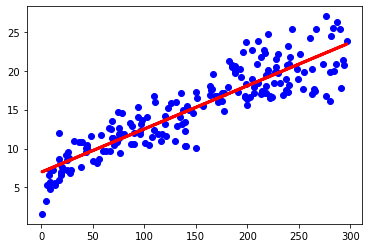

In [33]:
plt.scatter(X_TV,y,color='blue')
plt.plot(X_TV,reg.predict(X_TV),color='red',linewidth=3)
plt.show()

In [32]:
pred_space = np.linspace(min(X_TV), max(X_TV)).reshape(-1,1)

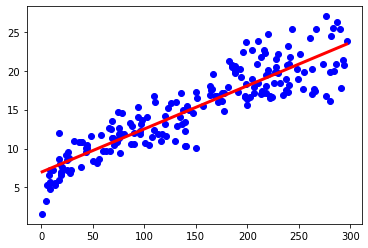

In [34]:
plt.scatter(X_TV,y,color='blue')
plt.plot(pred_space,reg.predict(pred_space),color='red',linewidth=3)
plt.show()